DAY 24 -- Mar 20, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocessing of categorical variables

- There are some categorical variables which will need to be mapped to numbers for input to learning

- [In practice, why do we convert categorical class labels to integers for classification?](http://stats.stackexchange.com/questions/134427/in-practice-why-do-we-convert-categorical-class-labels-to-integers-for-classifi)
- [SCIKIT-LEARN : DATA PREPROCESSING I - MISSING / CATEGORICAL DATA](http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php) (K Hong)

In [3]:
# The categorical variables
train_cat = train.loc[:,train.dtypes == object]

print(train_cat.shape)
train_cat.head()

(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Example of categorical variable

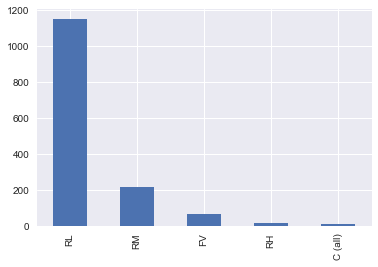

In [4]:
train_cat["MSZoning"].value_counts().plot(kind='bar')

### Enumeration

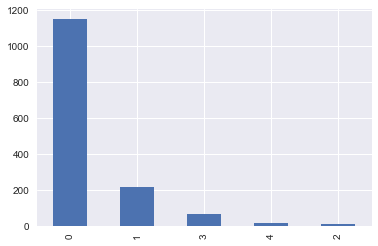

In [5]:
# Encode input values as an enumerated type or categorical variable
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.factorize.html
df = pd.factorize(train_cat.MSZoning)

import collections
df = collections.Counter(df[0])

pd.DataFrame.from_dict(dict(df), orient='index').sort_values(by=0, ascending=False).plot.bar(legend=False)

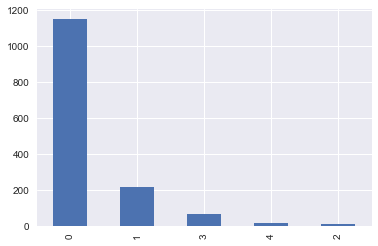

In [6]:
# Mapping of values
# Can define mappings manually or with "unique"
class_mapping = {'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4}
class_mapping = {v:i for i,v in enumerate(train_cat.MSZoning.unique())}

df = train_cat.MSZoning.map(class_mapping)
df.value_counts().sort_values(ascending=False).plot.bar(legend=False)

In [7]:
from sklearn import preprocessing

CLASSES: ['C (all)', 'FV', 'RH', 'RL', 'RM']
TRANSFORM: [1 2 4]
INVERSE: ['RH', 'RH', 'C (all)']


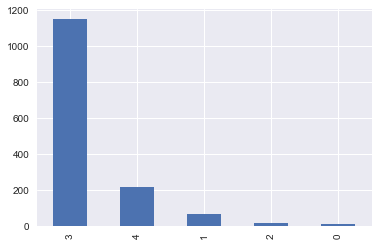

In [8]:
# Encode labels with value between 0 and n_classes-1.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = preprocessing.LabelEncoder()
le.fit(train_cat.MSZoning)

print("CLASSES:", list(le.classes_))
print("TRANSFORM:", le.transform(["FV", "RH", "RM"]))
print("INVERSE:", list(le.inverse_transform([2, 2, 0])))

pd.Series(le.transform(train_cat.MSZoning)).value_counts().sort_values(ascending=False).plot.bar(legend=False)

> One possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K or one-hot encoding, which is implemented in OneHotEncoder. This estimator transforms each categorical feature with m possible values into m binary features, with only one active.

- [What is one hot encoding and when is it used in data science?](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)

### One-hot

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


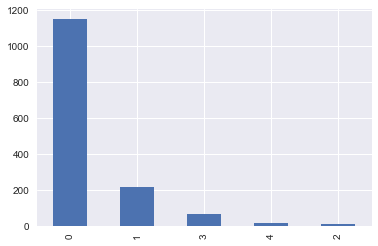

In [9]:
# Encode categorical integer features using a one-hot aka one-of-K scheme.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
enc = preprocessing.OneHotEncoder()
mydf = enc.fit_transform(df.to_frame()).toarray()
print(mydf)

pd.Series(mydf.sum(axis=0)).sort_values(ascending=False).plot.bar(legend=False)

In [10]:
# Convert categorical variable into dummy/indicator variables
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
df = pd.get_dummies(train_cat)

print(df.shape)
df.head()

(1460, 252)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


- Expand number of features
- For feature A with 3 classes {a1, a2, a3}, will get 3 features "A_a1", "A_a2", "A_a3"

### Simple test

In [11]:
test_df = pd.DataFrame({"Color": ['Red', 'Blue', "Red", "Green"], "A":[5, 6, 1, 9]})
test_df

,A,Color
0,5,Red
1,6,Blue
2,1,Red
3,9,Green


In [12]:
pd.get_dummies(test_df)

,A,Color_Blue,Color_Green,Color_Red
0,5,0,0,1
1,6,1,0,0
2,1,0,0,1
3,9,0,1,0


In [13]:
# Give an arbitrary integer
class_mapping = {'Blue':0, 'Red':1, 'Green':2}
test_df["Color"] = test_df["Color"].map(class_mapping)
print(test_df)

# Encode
enc = preprocessing.OneHotEncoder(categorical_features=[1])
enc.fit_transform(test_df).toarray()

   A  Color
0  5      1
1  6      0
2  1      1
3  9      2


array([[ 0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  6.],
       [ 0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  9.]])